# Libraries

In [301]:
import time
import math
import os
from collections import Counter
import datetime
#
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

# Data Analysis
import numpy as np
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from IPython.display import Image

# Visualation
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

 # KNN
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

# Supervised Learning
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression ,LogisticRegressionCV

# Naive
from sklearn.naive_bayes import GaussianNB

#decision_tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Crawllers and Scraping Funcs

In [10]:
#get temperature table from noaa website
my_url = 'https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/12/1880-2021'
option = Options()
option.headless = False
driver = webdriver.Chrome(options=option)
driver.get(my_url)
driver.maximize_window()
action = webdriver.ActionChains(driver)
search_bar = WebDriverWait(driver,
                            20).until(EC.presence_of_element_located((By.ID, 'valuesTable')))

html=driver.page_source
soup=BeautifulSoup(html,'html.parser')
div=soup.select_one("div#dataTable")
table=pd.read_html(str(div))
for i, tables in enumerate(table):
     tables.to_csv('noaaTemperature.csv')
print(table[0])

        Year Anomaly(1901-2000 Base Period)  Rank
0     202104                         0.79°C  1618
1     202103                         0.85°C  1641
2     202102                         0.65°C  1538
3     202101                         0.78°C  1614
4     202012                         0.78°C  1614
...      ...                            ...   ...
1691  188005                        -0.09°C   653
1692  188004                        -0.05°C   750
1693  188003                        -0.09°C   653
1694  188002                        -0.14°C   543
1695  188001                        -0.06°C   731

[1696 rows x 3 columns]


In [9]:
#get jsons from global-warming.org
url = 'https://global-warming.org'
tableUrl ='https://www.ncdc.noaa.gov/cag/'
HEADERS = {'user-agent': ('Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5)'
                           'AppleWebKit/537.36 (KHTML, like Gecko)'
                           'Chrome/45.0.2454.101 Safari/537.36'),
                           'referer': 'https://global-warming.org/'}

soup = requests.get(url)
temp =BeautifulSoup(soup.content, 'html.parser')
hrefs = temp.find_all("div", class_="content api-content")
for href in hrefs:
    print(href.b.contents[0].strip())
    response = requests.get(href.b.contents[0].strip(),headers=HEADERS)
    jsonurl = response.json()
    df = pd.json_normalize(jsonurl[list(response.json().keys())[-1]])
    df.to_csv(href.b.contents[0].strip().split("/")[-1].split("-")[0]+".csv",index=False)
    print(href.b.contents[0].strip().split("/")[-1].split("-")[0]+".csv")

https://global-warming.org/api/temperature-api
temperature.csv
https://global-warming.org/api/co2-api
co2.csv
https://global-warming.org/api/methane-api
methane.csv
https://global-warming.org/api/nitrous-oxide-api
nitrous.csv
https://global-warming.org/api/arctic-api
arctic.csv


In [142]:
temp = pd.read_csv(r'noaaTemperature.csv')
co2 = pd.read_csv(r'co2.csv')
methane = pd.read_csv(r'methane.csv')
nitrous = pd.read_csv(r'nitrous.csv')
arctic = pd.read_csv(r'arctic.csv')

In [12]:
temp

Unnamed: 0    Year Anomaly(1901-2000 Base Period)  Rank
0              0  202104                         0.79°C  1618
1              1  202103                         0.85°C  1641
2              2  202102                         0.65°C  1538
3              3  202101                         0.78°C  1614
4              4  202012                         0.78°C  1614
...          ...     ...                            ...   ...
1691        1691  188005                        -0.09°C   653
1692        1692  188004                        -0.05°C   750
1693        1693  188003                        -0.09°C   653
1694        1694  188002                        -0.14°C   543
1695        1695  188001                        -0.06°C   731

[1696 rows x 4 columns]

In [13]:
co2

year  month  day   cycle   trend
0     2011      1    1  391.25  389.74
1     2011      1    2  391.29  389.75
2     2011      1    3  391.32  389.76
3     2011      1    4  391.36  389.76
4     2011      1    5  391.39  389.77
...    ...    ...  ...     ...     ...
3783  2021      5   11  416.74  414.65
3784  2021      5   12  416.74  414.66
3785  2021      5   13  416.74  414.67
3786  2021      5   14  416.74  414.67
3787  2021      5   15  416.74  414.68

[3788 rows x 5 columns]

In [14]:
methane

date  average   trend  averageUnc  trendUnc
0    1983.70   1625.4  1634.3         2.4       1.5
1    1983.80   1627.4  1635.0         2.9       1.4
2    1983.90   1638.1  1635.7         2.2       1.3
3    1983.10   1644.7  1636.4         1.4       1.3
4    1983.11   1642.3  1637.2         0.8       1.2
..       ...      ...     ...         ...       ...
446  2020.90   1885.1  1883.3        -9.9      -9.9
447  2020.10   1890.8  1884.6        -9.9      -9.9
448  2020.11   1892.1  1885.8        -9.9      -9.9
449  2020.12   1893.0  1886.9        -9.9      -9.9
450  2021.10   1893.4  1887.9        -9.9      -9.9

[451 rows x 5 columns]

In [15]:
nitrous

date  average  trend  averageUnc  trendUnc
0    2001.30    316.2  316.2         0.2       0.1
1    2001.40    316.1  316.2         0.1       0.1
2    2001.50    316.1  316.3         0.1       0.1
3    2001.60    316.2  316.3         0.1       0.1
4    2001.70    316.2  316.4         0.1       0.1
..       ...      ...    ...         ...       ...
234  2020.90    333.3  333.3        -9.9      -9.9
235  2020.10    333.4  333.4        -9.9      -9.9
236  2020.11    333.6  333.5        -9.9      -9.9
237  2020.12    333.8  333.7        -9.9      -9.9
238  2021.10    333.9  333.8        -9.9      -9.9

[239 rows x 5 columns]

In [16]:
arctic

year  extent  area
0   1979    7.05  4.58
1   1980    7.67  4.87
2   1981    7.14  4.44
3   1982    7.30  4.43
4   1983    7.39  4.70
5   1984    6.81  4.11
6   1985    6.70  4.23
7   1986    7.41  4.72
8   1987    7.28  5.64
9   1988    7.37  5.36
10  1989    7.01  4.86
11  1990    6.14  4.55
12  1991    6.47  4.51
13  1992    7.47  5.43
14  1993    6.40  4.58
15  1994    7.14  5.13
16  1995    6.08  4.43
17  1996    7.58  5.62
18  1997    6.69  4.89
19  1998    6.54  4.30
20  1999    6.12  4.29
21  2000    6.25  4.35
22  2001    6.73  4.59
23  2002    5.83  4.03
24  2003    6.12  4.05
25  2004    5.98  4.39
26  2005    5.50  4.07
27  2006    5.86  4.01
28  2007    4.27  2.82
29  2008    4.69  3.26
30  2009    5.26  3.76
31  2010    4.87  3.34
32  2011    4.56  3.21
33  2012    3.57  2.41
34  2013    5.21  3.78
35  2014    5.22  3.74
36  2015    4.62  3.42
37  2016    4.53  2.91
38  2017    4.82  3.35
39  2018    4.79  3.35
40  2019    4.32  3.13

# Clean the data & Preper the data

In [143]:
#delete °C fro teperature column
temp['Anomaly(1901-2000 Base Period)'] = temp['Anomaly(1901-2000 Base Period)'].str.replace(r'°C$', '')

#calc mean of month from co2 df
group_data = co2.groupby(['year','month']).sum()
co2['CO2']=co2.groupby(['year','month']).cycle.transform('mean')
co2.drop_duplicates(subset=['CO2'],inplace=True,ignore_index=True)
co2.sort_values(by=['year', 'month'])
co2 = co2.drop(columns=['day','cycle','trend'])
data =pd.DataFrame()

#202104 - year -2021 , month - 04
temp['year'] = (temp['Year']/100).astype(int)
temp['month'] = (temp['Year']%100).astype(int)
#change col name
temp['temperature'] = (temp['Anomaly(1901-2000 Base Period)']).astype(float)
temp = temp.drop(columns=['Year','Rank','Anomaly(1901-2000 Base Period)'])


#methane data cleanind
methane = pd.read_csv(r'methane.csv')
methane['year'] = methane['date'].astype(int)
methane['month'] = np.where((np.modf(methane['date'])[0]>0.10)&(np.modf(methane['date'])[0]<0.13),(methane['date']*100%100).astype(int),(methane['date']*10%10).astype(int))
methane['month'] = methane['month'].replace(1,np.nan)
methane['CH4'] = methane['average']
methane = methane.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#nitrous cleaning data
nitrous = pd.read_csv(r'nitrous.csv')
nitrous['year'] = nitrous['date'].astype(int)
nitrous['month'] = np.where((np.modf(nitrous['date'])[0]>0.10)&(np.modf(nitrous['date'])[0]<0.13),(nitrous['date']*100%100).astype(int),(nitrous['date']*10%10).astype(int))
nitrous['month'] = nitrous['month'].replace(1,np.nan)
nitrous['N2O'] = nitrous['average']
nitrous = nitrous.drop(columns=['date','trend','averageUnc','trendUnc','average'])

#merge dfs
data = pd.merge(temp,co2,on=['year','month'],how="left")
data = pd.merge(data,methane,on=['year','month'],how="left")
data = pd.merge(data,nitrous,on=['year','month'],how="left")
data = data[['year','month','temperature','CO2','CH4','N2O']]
data

year  month  temperature         CO2     CH4    N2O
0     2021      4         0.79  416.435000     NaN    NaN
1     2021      3         0.85  416.117742     NaN    NaN
2     2021      2         0.65  415.695000     NaN    NaN
3     2021      1         0.78  415.020000     NaN    NaN
4     2020     12         0.78  414.470645  1893.0  333.8
...    ...    ...          ...         ...     ...    ...
1691  1880      5        -0.09         NaN     NaN    NaN
1692  1880      4        -0.05         NaN     NaN    NaN
1693  1880      3        -0.09         NaN     NaN    NaN
1694  1880      2        -0.14         NaN     NaN    NaN
1695  1880      1        -0.06         NaN     NaN    NaN

[1696 rows x 6 columns]

In [33]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1696 non-null   int64  
 1   year        1696 non-null   int32  
 2   month       1696 non-null   int32  
 3   tempeature  1696 non-null   float64
 4   co2         124 non-null    float64
 5   CH4         375 non-null    float64
 6   N2O         199 non-null    float64
dtypes: float64(4), int32(2), int64(1)
memory usage: 92.8 KB


# add more data(not enough data for machine learning)

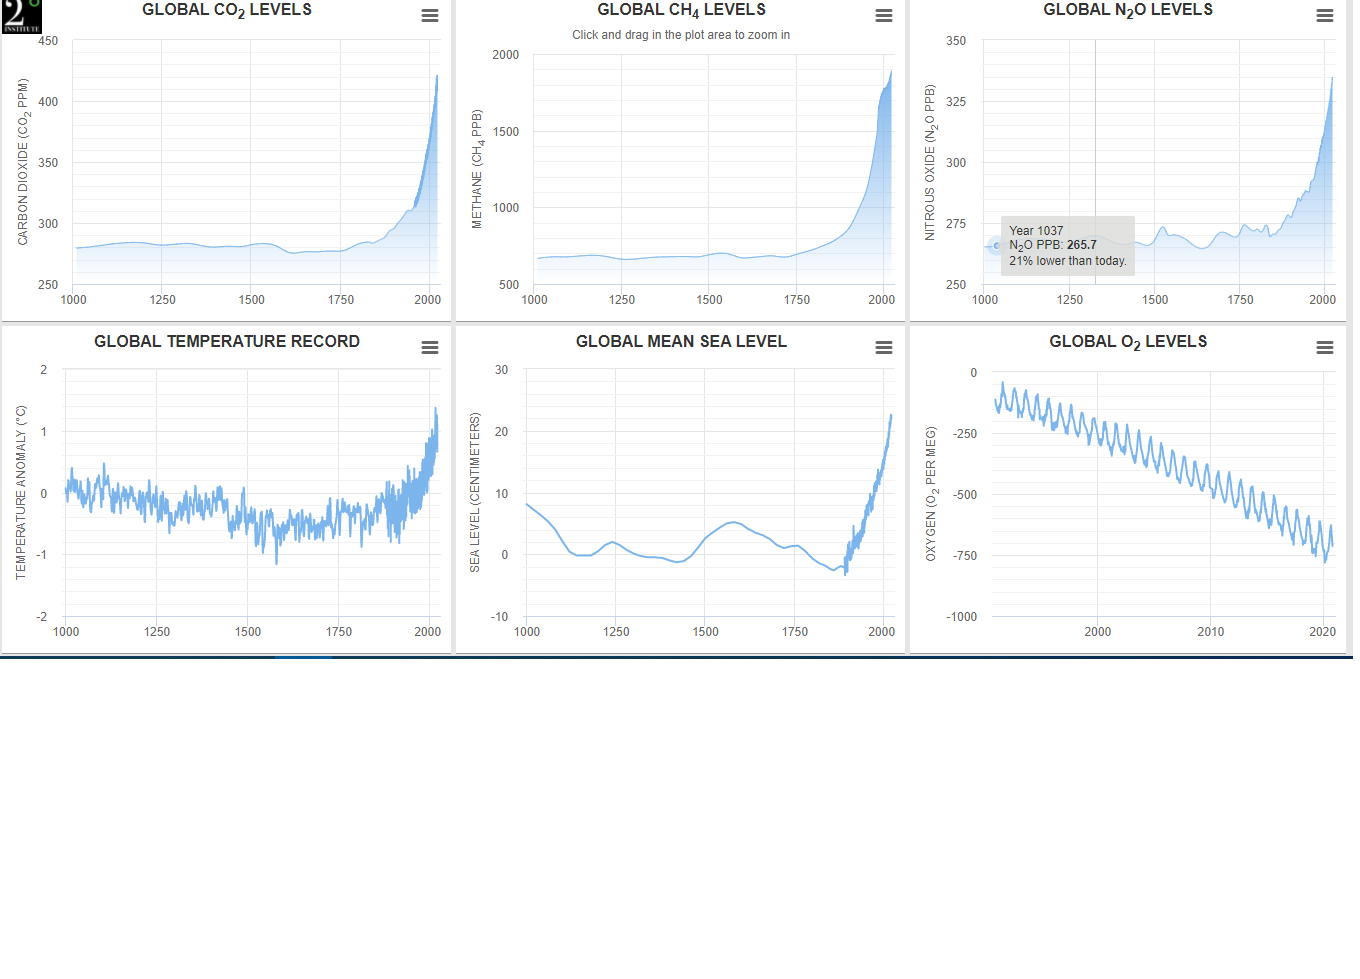

In [40]:
#https://www.climatelevels.org/?pid=2degreesinstitute&theme=grid-light
Image("image.png")

In [41]:
#links 
links = {'https://www.co2levels.org/':'globalCo2','https://www.oxygenlevels.org/':'globalO2',
         'https://www.n2olevels.org/':'globalN2o',
         'https://www.temperaturerecord.org/':'globalTemperatura',
         'https://www.methanelevels.org/':'globalMethane','https://www.sealevels.org/':'globalSealevel'}

In [ ]:
def get_data(links):
    for key,value in links:
        option = Options()
        option.headless = False
        driver = webdriver.Chrome(options=option)
        driver.get(key)
        driver.maximize_window()
        action = webdriver.ActionChains(driver)
        chart_search = WebDriverWait(driver,
                                   20).until(EC.presence_of_element_located((By.CLASS_NAME, 'highcharts-series-group')))
        search_button = driver.find_elements_by_css_selector('[onclick^=\"purecookieDismiss();\"]')[0]
        search_button.click()
        chart = driver.find_elements_by_css_selector('[fill^=\"none\"]')[0]
        action.move_to_element_with_offset(chart_search, chart_search.size['width'],0).perform()
        df = pd.DataFrame(columns=["year",value])
        pace=0
        while True:
            action.move_to_element_with_offset(chart_search, chart_search.size['width']+pace,0).perform()
            chart_text = driver.find_elements_by_css_selector('[style^=\"font-family:\"]')[3].text
            if chart_text!="":
                data = chart_text.split("\n")
                df=df.append({"year":data[0],value:data[1].split(":")[1]},ignore_index=True)
                pace =pace -1
            elif chart_text=="":
                break
        driver.quit()
        df.to_csv(value+".csv")

In [141]:
#set monthly data df
years = range(2021,999,-1)
months = range(12,0,-1)
df = pd.DataFrame(columns=["year","month"])
for year in years:
    for month in months:
        df =df.append({"year":year,"month":month},ignore_index=True)
df.head(20)

year month
0   2021    12
1   2021    11
2   2021    10
3   2021     9
4   2021     8
5   2021     7
6   2021     6
7   2021     5
8   2021     4
9   2021     3
10  2021     2
11  2021     1
12  2020    12
13  2020    11
14  2020    10
15  2020     9
16  2020     8
17  2020     7
18  2020     6
19  2020     5

In [166]:
#prepare temperatura data
test = pd.read_csv("globalTemperatura.csv")
test=test.drop_duplicates(subset=['year'])
test['temperature'] = test['temperature'].str.replace(r'°C$', '')
test =test[test.year.str.contains("January 2", na=False)]
Temperatura = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B %d, %Y")
    Temperatura = Temperatura.append({"year":datee.year,"month":datee.month,"temperature":row["temperature"]},ignore_index=True)
Temperatura['year'] = Temperatura['year'].astype(int)
Temperatura['month'] = Temperatura['month'].astype(int)
Temperatura['temperature'] = Temperatura['temperature'].astype(float)
temp_data = pd.concat([temp,Temperatura],ignore_index =True,sort=False)
temp_data=temp_data.drop_duplicates(subset=['year', 'month'])
temp_data = temp_data[['year','month','temperature']]

#prepare Co2 data
test = pd.read_csv("globalCo2.csv")
test=test.drop_duplicates(subset=['year'])
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Co2 = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Co2 = Co2.append({"year":datee.year,"month":datee.month,"CO2":row["co2"]},ignore_index=True)
Co2['year'] = Co2['year'].astype(int)
Co2['month'] = Co2['month'].astype(int)
Co2_data = pd.concat([co2,Co2],ignore_index =True,sort=False)
Co2_data=Co2_data.drop_duplicates(subset=['year', 'month'])
Co2_data = Co2_data[['year','month','CO2']]

#prepare methane data
test = pd.read_csv("globalMethane.csv")
test=test.drop_duplicates(subset=['year'])
test =test[test.year.str.contains("Year", na=False)]
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Methane = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Methane = Methane.append({"year":datee.year,"month":datee.month,"CH4":row["methane"]},ignore_index=True)
Methane['year'] = Methane['year'].astype(int)
Methane['month'] = Methane['month'].astype(int)
Methane_data = pd.concat([methane,Methane],ignore_index =True,sort=False)
Methane_data=Methane_data.drop_duplicates(subset=['year', 'month'])
Methane_data = Methane_data[['year','month','CH4']]

#prepare nitrous data
test = pd.read_csv("globalN2o.csv")
test=test.drop_duplicates(subset=['year'])
test =test[test.year.str.contains("Year", na=False)]
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Nitrous = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Nitrous = Nitrous.append({"year":datee.year,"month":datee.month,"N2O":row["n2o"]},ignore_index=True)
Nitrous['year'] = Nitrous['year'].astype(int)
Nitrous['month'] = Nitrous['month'].astype(int)
Nitrous_data = pd.concat([nitrous,Nitrous],ignore_index =True,sort=False)
Nitrous_data=Nitrous_data.drop_duplicates(subset=['year', 'month'])
Nitrous_data = Nitrous_data[['year','month','N2O']]

#merge all data together
merged_data = pd.merge(df,temp_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Co2_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Methane_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Nitrous_data,on=['year','month'],how="left")
merged_data=merged_data.drop_duplicates(subset=['year', 'month'])

In [167]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12264 entries, 0 to 12263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12264 non-null  object 
 1   month        12264 non-null  object 
 2   temperature  2576 non-null   float64
 3   CO2          479 non-null    float64
 4   CH4          570 non-null    float64
 5   N2O          1176 non-null   float64
dtypes: float64(4), object(2)
memory usage: 670.7+ KB


In [281]:
#replace Nana with linear method
interpolate_data = merged_data.interpolate(method='linear',limit_direction='both')
interpolate_data

year month  temperature         CO2     CH4    N2O
0      2021    12     0.790000  416.709333  1893.0  333.8
1      2021    11     0.790000  416.709333  1893.0  333.8
2      2021    10     0.790000  416.709333  1893.0  333.8
3      2021     9     0.790000  416.709333  1893.0  333.8
4      2021     8     0.790000  416.709333  1893.0  333.8
...     ...   ...          ...         ...     ...    ...
12259  1000     5     0.043333  280.000000   667.0  265.3
12260  1000     4     0.050000  280.000000   667.0  265.3
12261  1000     3     0.056667  280.000000   667.0  265.3
12262  1000     2     0.063333  280.000000   667.0  265.3
12263  1000     1     0.070000  280.000000   667.0  265.3

[12264 rows x 6 columns]

In [282]:
interpolate_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12264 entries, 0 to 12263
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         12264 non-null  object 
 1   month        12264 non-null  object 
 2   temperature  12264 non-null  float64
 3   CO2          12264 non-null  float64
 4   CH4          12264 non-null  float64
 5   N2O          12264 non-null  float64
dtypes: float64(4), object(2)
memory usage: 670.7+ KB


In [283]:
interpolate_data = interpolate_data.drop_duplicates(subset=['temperature', 'CO2','CH4','N2O'],ignore_index=True)
interpolate_data =interpolate_data.iloc[1:]
interpolate_data

year month  temperature         CO2     CH4    N2O
1      2021     4     0.790000  416.435000  1893.0  333.8
2      2021     3     0.850000  416.117742  1893.0  333.8
3      2021     2     0.650000  415.695000  1893.0  333.8
4      2021     1     0.780000  415.020000  1893.0  333.8
5      2020    12     0.780000  414.470645  1893.0  333.8
...     ...   ...          ...         ...     ...    ...
12190  1000     6     0.036667  280.000000   667.0  265.3
12191  1000     5     0.043333  280.000000   667.0  265.3
12192  1000     4     0.050000  280.000000   667.0  265.3
12193  1000     3     0.056667  280.000000   667.0  265.3
12194  1000     2     0.063333  280.000000   667.0  265.3

[12194 rows x 6 columns]

# Visualation

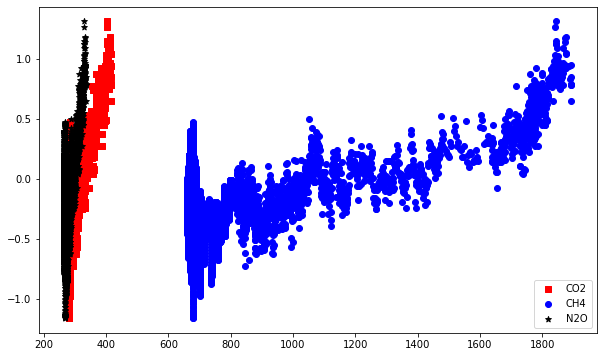

In [386]:
interpolate_data
plt.scatter(x=interpolate_data['CO2'],y=interpolate_data['temperature'],c='r',marker='s',label='CO2')
plt.scatter(x=interpolate_data['CH4'],y=interpolate_data['temperature'],c='b',marker='o',label='CH4')
plt.scatter(x=interpolate_data['N2O'],y=interpolate_data['temperature'],c='k',marker='*',label='N2O')
#plt.scatter(x=interpolate_data['year'],y=interpolate_data['N2O'],c='g',marker='D',label='N2O')

plt.legend(numpoints=1,loc=4)
#plt.xlabel('Ad budget (Thousands of dollars)')
#plt.ylabel('Sales (units of product)')
plt.show()

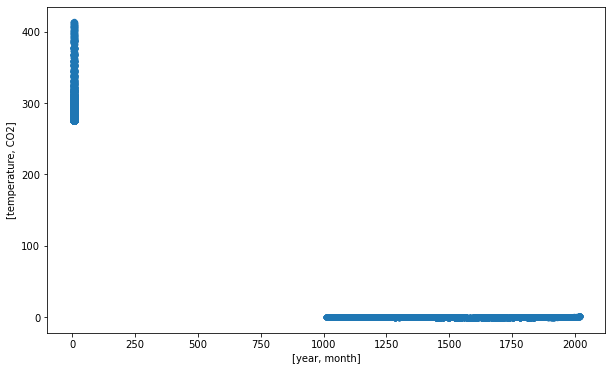

In [272]:
interpolate_data.plot.scatter(x=['year','month'], y=['temperature','CO2']);

# Machine Learning

Split to train and test

In [499]:
X = interpolate_data[['CO2','CH4','N2O']].values.reshape(interpolate_data[['CO2','CH4','N2O']].shape[0],3)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)

In [443]:
# Scale the data

scaler = StandardScaler()
X_scale_train = scaler.fit_transform(X_train)
X_scale_test = scaler.transform(X_test)


In [500]:
# Lists

category = ['Slope','Intercept','R2']
machine= []
train = []
test = []

# linear regression

             temperature       CO2       CH4       N2O
temperature     1.000000  0.617863  0.562119  0.530518
CO2             0.617863  1.000000  0.976023  0.975416
CH4             0.562119  0.976023  1.000000  0.980627
N2O             0.530518  0.975416  0.980627  1.000000


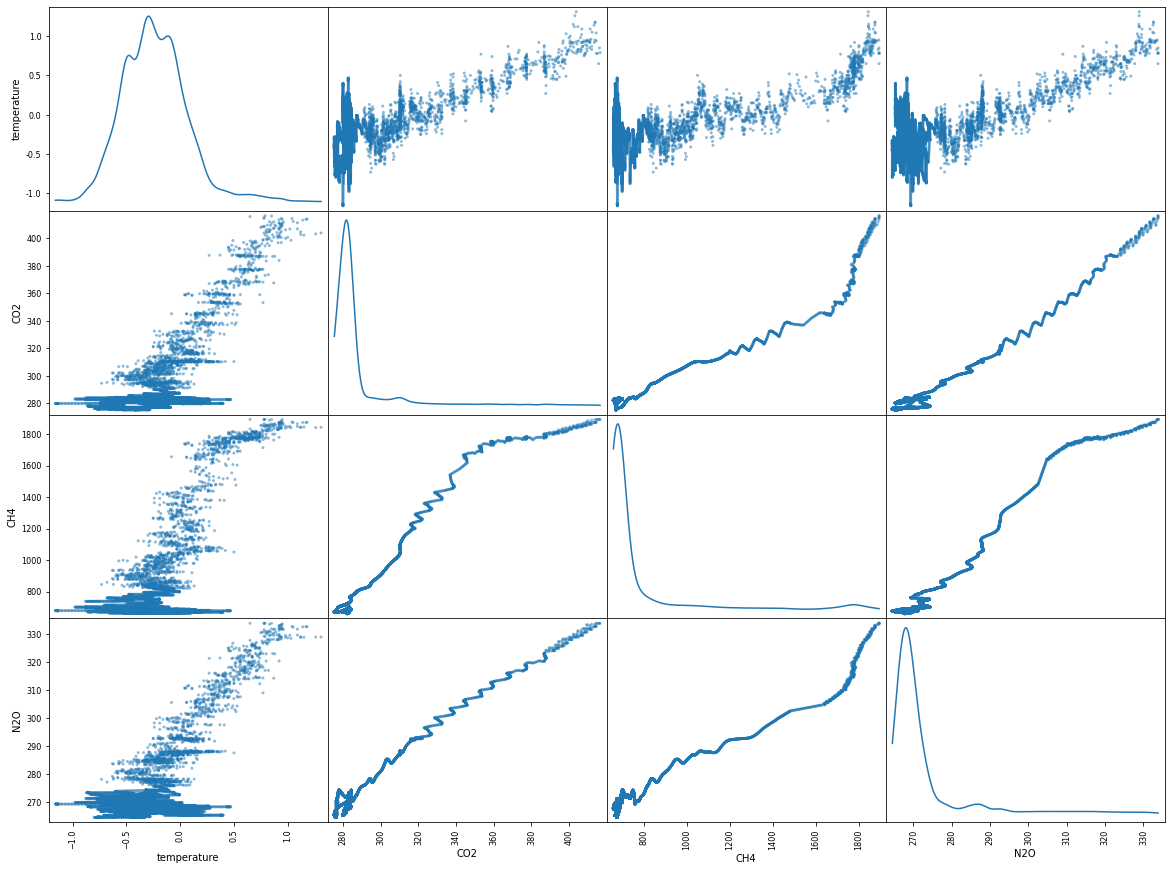

In [519]:
print(interpolate_data[['temperature','CO2','CH4','N2O']].corr())
pd.plotting.scatter_matrix(interpolate_data[['temperature','CO2','CH4','N2O']], figsize=(20, 15), diagonal='kde')
plt.show()

In [520]:
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)

Slope: [[0.01431931]]
Intercept: [-4.13456963]


In [521]:
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

R2: 0.28144967884573124
R2: 0.28144967884573124


In [522]:
train.append(round(LR_clf.score(X,y), 5))
test.append(round(metrics.r2_score(y,LR_clf.predict(X)), 5))
machine.append("All")

TypeError: type numpy.ndarray doesn't define __round__ method

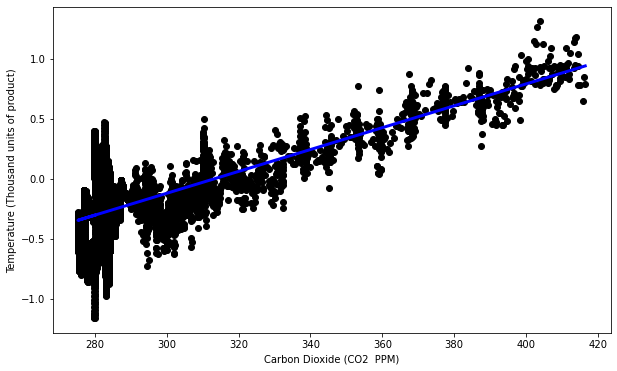

Slope: [[0.00911098]]
Intercept: [-2.85455037]
R2: 0.38175513967633046
R2: 0.38175513967633046


In [506]:
X = interpolate_data[['CO2']].values.reshape(interpolate_data[['CO2']].shape[0],1)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
train.append(round(LR_clf.score(X,y), 5))
test.append(round(metrics.r2_score(y,LR_clf.predict(X)), 5))
machine.append("CO2")
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Carbon Dioxide (CO2  PPM)')
plt.ylabel('Temperature Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

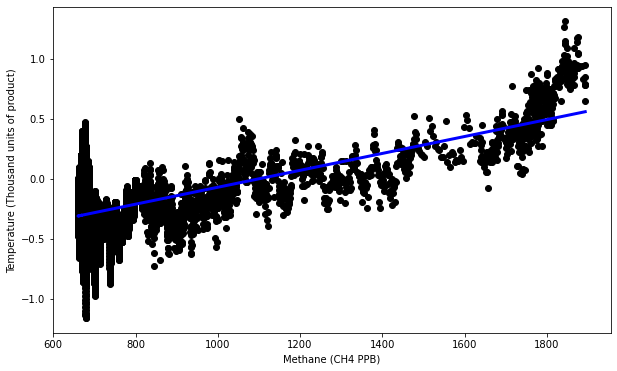

Slope: [[0.0007048]]
Intercept: [-0.77590843]
R2: 0.31597775851838095
R2: 0.31597775851838095


In [507]:
X = interpolate_data[['CH4']].values.reshape(interpolate_data[['CH4']].shape[0],1)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
train.append(round(LR_clf.score(X,y), 5))
test.append(round(metrics.r2_score(y,LR_clf.predict(X)), 5))
machine.append("CH4")
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Methane (CH4 PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

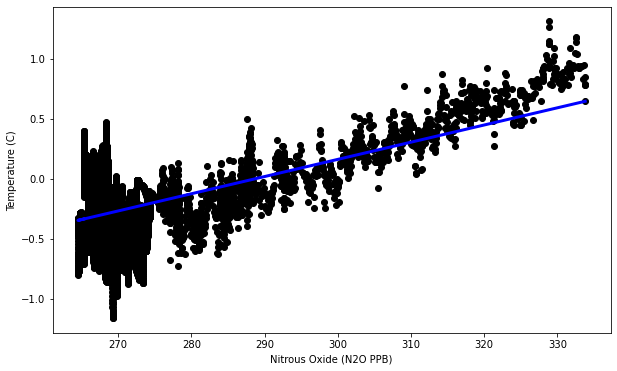

Slope: [[0.01431931]]
Intercept: [-4.13456963]
R2: 0.28144967884573124
R2: 0.28144967884573124


In [508]:
X = interpolate_data[['N2O']].values.reshape(interpolate_data[['N2O']].shape[0],1)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf.fit(X=X, y=y)
train.append(round(LR_clf.score(X,y), 5))
test.append(round(metrics.r2_score(y,LR_clf.predict(X)), 5))
machine.append("N2O")
plt.scatter(X, y,  color='black')
plt.plot(X, LR_clf.predict(X), color='blue', linewidth=3)

plt.xlabel('Nitrous Oxide (N2O PPB)')
plt.ylabel('Temperature (C)')
plt.show()
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

# results

No handles with labels found to put in legend.


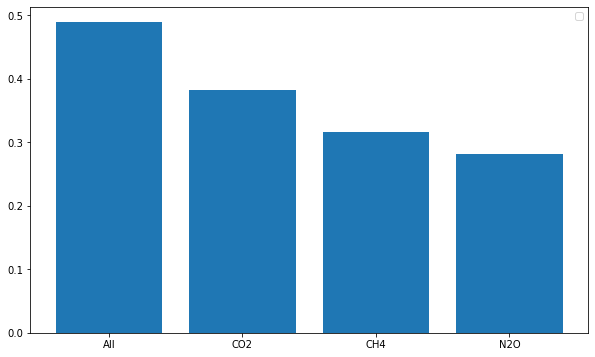

In [523]:
plt.bar(machine,test)


# improve prediction

lets add sea level to data

In [536]:
years = range(2021,999,-1)
months = range(12,0,-1)
df = pd.DataFrame(columns=["year","month"])
for year in years:
    for month in months:
        df =df.append({"year":year,"month":month},ignore_index=True)
        
#prepare temperatura data
test = pd.read_csv("globalTemperatura.csv")
test=test.drop_duplicates(subset=['year'])
test['temperature'] = test['temperature'].str.replace(r'°C$', '')
test =test[test.year.str.contains("January 2", na=False)]
Temperatura = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B %d, %Y")
    Temperatura = Temperatura.append({"year":datee.year,"month":datee.month,"temperature":row["temperature"]},ignore_index=True)
Temperatura['year'] = Temperatura['year'].astype(int)
Temperatura['month'] = Temperatura['month'].astype(int)
Temperatura['temperature'] = Temperatura['temperature'].astype(float)
temp_data = pd.concat([temp,Temperatura],ignore_index =True,sort=False)
temp_data=temp_data.drop_duplicates(subset=['year', 'month'])
temp_data = temp_data[['year','month','temperature']]

#prepare Co2 data
test = pd.read_csv("globalCo2.csv")
test=test.drop_duplicates(subset=['year'])
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Co2 = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Co2 = Co2.append({"year":datee.year,"month":datee.month,"CO2":row["co2"]},ignore_index=True)
Co2['year'] = Co2['year'].astype(int)
Co2['month'] = Co2['month'].astype(int)
Co2_data = pd.concat([co2,Co2],ignore_index =True,sort=False)
Co2_data=Co2_data.drop_duplicates(subset=['year', 'month'])
Co2_data = Co2_data[['year','month','CO2']]

#prepare methane data
test = pd.read_csv("globalMethane.csv")
test=test.drop_duplicates(subset=['year'])
test =test[test.year.str.contains("Year", na=False)]
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Methane = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Methane = Methane.append({"year":datee.year,"month":datee.month,"CH4":row["methane"]},ignore_index=True)
Methane['year'] = Methane['year'].astype(int)
Methane['month'] = Methane['month'].astype(int)
Methane_data = pd.concat([methane,Methane],ignore_index =True,sort=False)
Methane_data=Methane_data.drop_duplicates(subset=['year', 'month'])
Methane_data = Methane_data[['year','month','CH4']]

#prepare nitrous data
test = pd.read_csv("globalN2o.csv")
test=test.drop_duplicates(subset=['year'])
test =test[test.year.str.contains("Year", na=False)]
test['year'] = test['year'].str.replace(r'Year', 'May, 12, ')
Nitrous = pd.DataFrame()
for index, row in test.iterrows():
    datee = datetime.datetime.strptime(row["year"], "%B, %d, %Y")
    Nitrous = Nitrous.append({"year":datee.year,"month":datee.month,"N2O":row["n2o"]},ignore_index=True)
Nitrous['year'] = Nitrous['year'].astype(int)
Nitrous['month'] = Nitrous['month'].astype(int)
Nitrous_data = pd.concat([nitrous,Nitrous],ignore_index =True,sort=False)
Nitrous_data=Nitrous_data.drop_duplicates(subset=['year', 'month'])
Nitrous_data = Nitrous_data[['year','month','N2O']]


#prepare Sea_level data
test = pd.read_csv("globalSealevel.csv")
test=test.drop_duplicates(subset=['year'])
test['year'] = test['year'].str.replace(r'Year', 'May 12, ')
test['year'] = test['year'].str.replace(r'-', ' 12, ')
Sea_level = pd.DataFrame()
for index, row in test.iterrows():
    try:
        datee = datetime.datetime.strptime(row["year"], "%b %d, %y")
        Sea_level = Sea_level.append({"year":datee.year,"month":datee.month,"Sea_level":row["sealevel"]},ignore_index=True)
    except:
        datee = datetime.datetime.strptime(row["year"], "%B %d, %Y")
        Sea_level = Sea_level.append({"year":datee.year,"month":datee.month,"Sea_level":row["sealevel"]},ignore_index=True)
Sea_level['year'] = Sea_level['year'].astype(int)
Sea_level['month'] = Sea_level['month'].astype(int)
Sea_level_data = Sea_level[['year','month','Sea_level']]

#merge all data together
merged_data = pd.merge(df,temp_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Co2_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Methane_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Nitrous_data,on=['year','month'],how="left")
merged_data = merged_data.merge(Sea_level_data,on=['year','month'],how="left")
merged_data=merged_data.drop_duplicates(subset=['year', 'month'])

In [541]:
#replace Nana with linear method
interpolate_data = merged_data.interpolate(method='linear',limit_direction='both')
interpolate_data = interpolate_data.drop_duplicates(subset=['temperature', 'CO2','CH4','N2O','Sea_level'],ignore_index=True)
interpolate_data

year month  temperature         CO2     CH4    N2O  Sea_level
0      2021    12     0.790000  416.709333  1893.0  333.8       21.1
1      2021     4     0.790000  416.435000  1893.0  333.8       21.1
2      2021     3     0.850000  416.117742  1893.0  333.8       21.1
3      2021     2     0.650000  415.695000  1893.0  333.8       21.1
4      2021     1     0.780000  415.020000  1893.0  333.8       21.1
...     ...   ...          ...         ...     ...    ...        ...
12231  1000     5     0.043333  280.000000   667.0  265.3        8.1
12232  1000     4     0.050000  280.000000   667.0  265.3        8.1
12233  1000     3     0.056667  280.000000   667.0  265.3        8.1
12234  1000     2     0.063333  280.000000   667.0  265.3        8.1
12235  1000     1     0.070000  280.000000   667.0  265.3        8.1

[12236 rows x 7 columns]

             temperature       CO2       CH4       N2O  Sea_level
temperature     1.000000  0.617294  0.561630  0.529868   0.453082
CO2             0.617294  1.000000  0.975980  0.975390   0.735200
CH4             0.561630  0.975980  1.000000  0.980600   0.735435
N2O             0.529868  0.975390  0.980600  1.000000   0.705503
Sea_level       0.453082  0.735200  0.735435  0.705503   1.000000


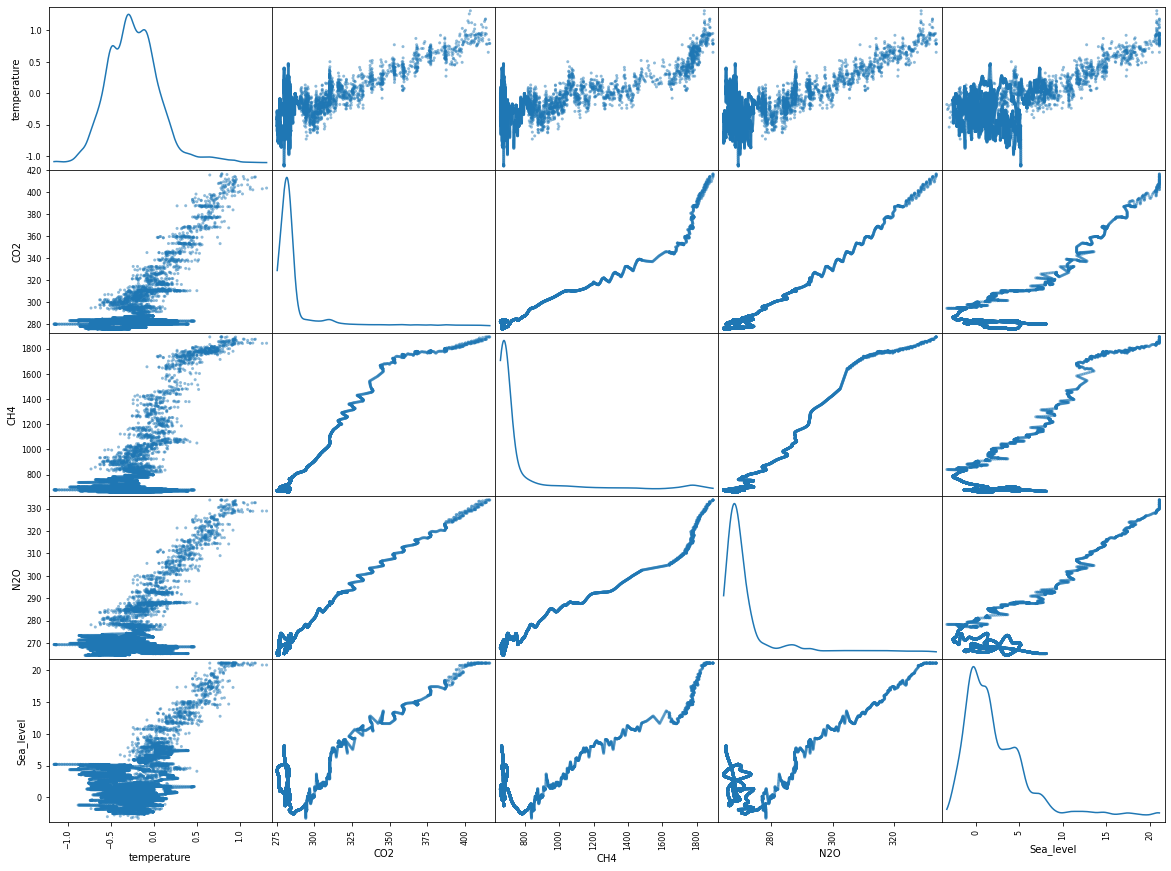

In [542]:
print(interpolate_data[['temperature','CO2','CH4','N2O','Sea_level']].corr())
pd.plotting.scatter_matrix(interpolate_data[['temperature','CO2','CH4','N2O','Sea_level']], figsize=(20, 15), diagonal='kde')
plt.show()

In [546]:
X = interpolate_data[['year','month','CO2','CH4','N2O','Sea_level']].values.reshape(interpolate_data[['year','month','CO2','CH4','N2O','Sea_level']].shape[0],6)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

Slope: [[-7.41790041e-04 -8.10203960e-05  2.48363984e-03  1.12207838e-03
   3.60767590e-03 -2.15824948e-02]]
Intercept: [-1.61984069]
R2: 0.6365492708605069
R2: 0.6365492708605069


In [550]:
interpolate_data["Sea_levelxN2O"]=interpolate_data["Sea_level"]*interpolate_data["N2O"]
X = interpolate_data[['Sea_levelxN2O','year','month','CO2','CH4','N2O','Sea_level']].values.reshape(interpolate_data[['Sea_levelxN2O','year','month','CO2','CH4','N2O','Sea_level']].shape[0],7)
y =interpolate_data['temperature'].values.reshape(interpolate_data['temperature'].shape[0],1)
LR_clf = linear_model.LinearRegression().fit(X=X, y=y)
print("Slope:",LR_clf.coef_)
print("Intercept:",LR_clf.intercept_)
print("R2:",LR_clf.score(X,y))
print("R2:",metrics.r2_score(y,LR_clf.predict(X)))

Slope: [[-2.13286074e-04 -7.25417762e-04 -6.63673330e-05  5.49671998e-03
   1.00322601e-03  2.95460056e-03  3.78852002e-02]]
Intercept: [-2.23855462]
R2: 0.6374686056465044
R2: 0.6374686056465044


This model is not really emproved prediction.  R2=64% so data contains 'year','month','CO2','CH4','N2O','Sea_level' is the MAX resalt for prediction